In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


# Data Analysing with seaborn

In [5]:
import seaborn as sns #for analysing data

In [6]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

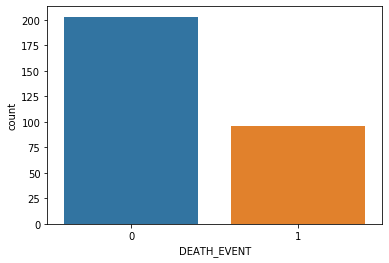

In [7]:
sns.countplot(x=df.DEATH_EVENT)

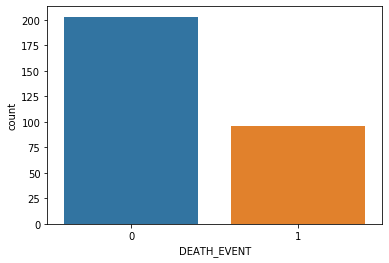

In [8]:
sns.countplot(x='DEATH_EVENT', data=df)

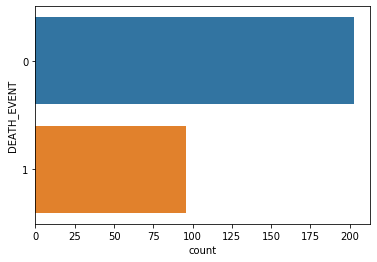

In [9]:
sns.countplot(y=df.DEATH_EVENT)

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

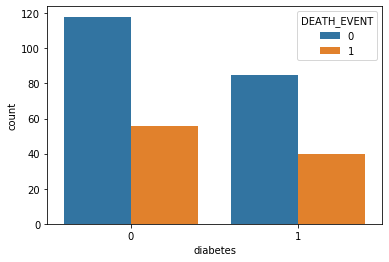

In [11]:
sns.countplot(x='diabetes',hue='DEATH_EVENT', data=df)

In [12]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

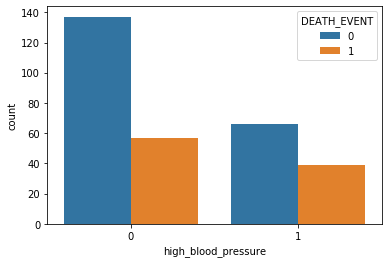

In [13]:
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT', data=df)

In [14]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

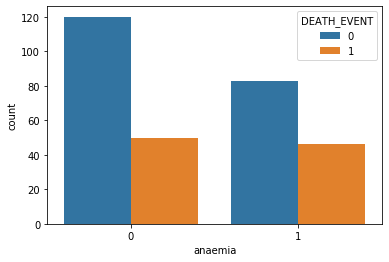

In [15]:
sns.countplot(x='anaemia',hue='DEATH_EVENT', data=df)

# Model Training

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(df.drop('DEATH_EVENT',axis=1),df['DEATH_EVENT'], train_size=0.7, random_state=1)

In [18]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126


In [19]:
ytrain.head()

14     0
210    0
236    0
44     1
163    1
Name: DEATH_EVENT, dtype: int64

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [21]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
testing = clf.predict(xtest)

In [23]:
np.array(ytest)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [24]:
clf.score(xtrain,ytrain)

1.0

In [25]:
clf.score(xtest,ytest)

0.7888888888888889

In [26]:
from sklearn.metrics import roc_curve, classification_report, confusion_matrix

In [27]:
print(classification_report(ytest,testing))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        64
           1       0.64      0.62      0.63        26

    accuracy                           0.79        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.79      0.79      0.79        90



In [28]:
conf_mat = (confusion_matrix(ytest,testing))

In [29]:
conf_mat

array([[55,  9],
       [10, 16]], dtype=int64)

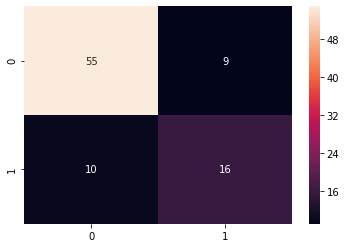

In [30]:
sns.heatmap(conf_mat, annot=True)

In [31]:
tp,fn,fp,tn = confusion_matrix(ytest,testing).reshape(-1)

In [32]:
tp

55

In [33]:
fn

9

In [34]:
fp

10

In [35]:
tn

16

In [36]:
accuracy = (tp+tn)/(tp+fn+fp+tn)

In [37]:
accuracy

0.7888888888888889

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
RndClf = RandomForestClassifier()

In [40]:
RndClf.fit(xtrain,ytrain)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
RndClf.score(xtest,ytest)

0.8

# Hyper Parameter Tuning

In [50]:
trees = np.random.randint(25,300,25)

In [43]:
trees

array([124, 164, 147, 134, 280, 261, 120, 256, 265, 149, 214,  96, 202,
        38, 176, 299,  43, 245, 243, 285, 171, 228, 283, 101, 164])

In [69]:
#parameters for random forest
criterion = ['gini','entropy']
max_depth = np.random.randint(1,15,20)
min_samples_split = [2,3,4]
max_features = ['sqrt','log2']

In [70]:
ids = {
    'n_estimators' : trees,
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'max_features' : max_features
}

# RandomizedSearchCV

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
rcv = RandomizedSearchCV(RndClf,ids,n_iter=200,cv=3)

In [73]:
rcv.fit(xtrain,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [76]:
rcv.cv_results_

{'mean_fit_time': array([0.15189815, 0.25564845, 0.29279367, 0.11470739, 0.31154577,
        0.34498866, 0.12333695, 0.20777806, 0.2954433 , 0.09276199,
        0.21645403, 0.28324294, 0.1188995 , 0.09374253, 0.23671317,
        0.1573139 , 0.07652243, 0.28674881, 0.29689439, 0.24055258,
        0.29487761, 0.09225384, 0.15064653, 0.16090727, 0.28513773,
        0.24374167, 0.16010769, 0.16302554, 0.20294793, 0.11453772,
        0.15679932, 0.30304281, 0.1758128 , 0.29839778, 0.0995098 ,
        0.11102247, 0.2497956 , 0.17054168, 0.1710639 , 0.13618565,
        0.09026543, 0.27857749, 0.25155671, 0.18982538, 0.11457316,
        0.27377645, 0.14749455, 0.21858088, 0.02691428, 0.21488579,
        0.05421456, 0.14943584, 0.06050523, 0.17486556, 0.21580966,
        0.22673368, 0.08329797, 0.0929029 , 0.10438395, 0.20333346,
        0.14106162, 0.21276418, 0.08761152, 0.09530377, 0.21555154,
        0.12965218, 0.14228702, 0.21469021, 0.09940116, 0.19684354,
        0.07518466, 0.07945426,

In [77]:
cv_result = pd.DataFrame(rcv.cv_results_)

In [78]:
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.151898,5.849290e-03,0.015625,1.244347e-03,162,2,log2,4,gini,"{'n_estimators': 162, 'min_samples_split': 2, ...",0.774648,0.797101,0.869565,0.813397,0.040488,22
1,0.255648,1.318777e-02,0.024273,1.241183e-03,256,4,log2,9,gini,"{'n_estimators': 256, 'min_samples_split': 4, ...",0.816901,0.811594,0.811594,0.813397,0.002514,22
2,0.292794,1.069996e-02,0.028490,2.037285e-03,281,2,sqrt,6,entropy,"{'n_estimators': 281, 'min_samples_split': 2, ...",0.816901,0.797101,0.811594,0.808612,0.008368,55
3,0.114707,1.416146e-03,0.012619,9.250977e-04,114,4,sqrt,3,gini,"{'n_estimators': 114, 'min_samples_split': 4, ...",0.845070,0.797101,0.840580,0.827751,0.021596,4
4,0.311546,8.951660e-03,0.029601,3.752451e-03,281,4,log2,11,gini,"{'n_estimators': 281, 'min_samples_split': 4, ...",0.830986,0.811594,0.811594,0.818182,0.009184,15
5,0.344989,5.085500e-02,0.033911,4.956066e-03,289,3,sqrt,10,gini,"{'n_estimators': 289, 'min_samples_split': 3, ...",0.774648,0.811594,0.797101,0.794258,0.015249,156
6,0.123337,9.152654e-03,0.012633,9.397065e-04,101,2,sqrt,11,gini,"{'n_estimators': 101, 'min_samples_split': 2, ...",0.774648,0.797101,0.826087,0.799043,0.021092,130
7,0.207778,5.423575e-03,0.019282,1.245153e-03,184,3,sqrt,13,entropy,"{'n_estimators': 184, 'min_samples_split': 3, ...",0.788732,0.811594,0.826087,0.808612,0.015427,55
8,0.295443,1.653495e-02,0.028271,2.607271e-03,281,2,log2,7,gini,"{'n_estimators': 281, 'min_samples_split': 2, ...",0.788732,0.797101,0.826087,0.803828,0.015998,94
9,0.092762,5.858754e-03,0.010628,1.259338e-03,86,3,sqrt,9,gini,"{'n_estimators': 86, 'min_samples_split': 3, '...",0.788732,0.826087,0.826087,0.813397,0.017692,22


In [79]:
rcv.best_score_

0.8373205741626795

In [81]:
rcv.best_params_

{'n_estimators': 160,
 'min_samples_split': 4,
 'max_features': 'log2',
 'max_depth': 13,
 'criterion': 'entropy'}

In [82]:
clf3 = rcv.best_estimator_

In [83]:
clf3.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=13, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
clf3.score(xtest,ytest)

0.8888888888888888

In [86]:
RndClf.score(xtest,ytest)

0.8

# Grid Search CV

In [88]:
trees = np.random.randint(25,300,25)
criterion = ['gini','entropy']
max_depth = np.random.randint(1,15,20)
min_samples_split = [2,3,4]
max_features = ['sqrt','log2']

In [90]:
ids = {
    'n_estimators' : trees,
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'max_features' : max_features
}

In [91]:
from sklearn.model_selection import GridSearchCV

In [94]:
rcv2 = GridSearchCV(RndClf,ids,cv=3)

In [95]:
rcv2.fit(xtrain,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,...
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1, 12, 12,  3,  8,  9,  6,  2, 10,  7,  1, 10,  6,  5

In [96]:
cv_result = pd.DataFrame(rcv.cv_results_)

In [97]:
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.151898,5.849290e-03,0.015625,1.244347e-03,162,2,log2,4,gini,"{'n_estimators': 162, 'min_samples_split': 2, ...",0.774648,0.797101,0.869565,0.813397,0.040488,22
1,0.255648,1.318777e-02,0.024273,1.241183e-03,256,4,log2,9,gini,"{'n_estimators': 256, 'min_samples_split': 4, ...",0.816901,0.811594,0.811594,0.813397,0.002514,22
2,0.292794,1.069996e-02,0.028490,2.037285e-03,281,2,sqrt,6,entropy,"{'n_estimators': 281, 'min_samples_split': 2, ...",0.816901,0.797101,0.811594,0.808612,0.008368,55
3,0.114707,1.416146e-03,0.012619,9.250977e-04,114,4,sqrt,3,gini,"{'n_estimators': 114, 'min_samples_split': 4, ...",0.845070,0.797101,0.840580,0.827751,0.021596,4
4,0.311546,8.951660e-03,0.029601,3.752451e-03,281,4,log2,11,gini,"{'n_estimators': 281, 'min_samples_split': 4, ...",0.830986,0.811594,0.811594,0.818182,0.009184,15
5,0.344989,5.085500e-02,0.033911,4.956066e-03,289,3,sqrt,10,gini,"{'n_estimators': 289, 'min_samples_split': 3, ...",0.774648,0.811594,0.797101,0.794258,0.015249,156
6,0.123337,9.152654e-03,0.012633,9.397065e-04,101,2,sqrt,11,gini,"{'n_estimators': 101, 'min_samples_split': 2, ...",0.774648,0.797101,0.826087,0.799043,0.021092,130
7,0.207778,5.423575e-03,0.019282,1.245153e-03,184,3,sqrt,13,entropy,"{'n_estimators': 184, 'min_samples_split': 3, ...",0.788732,0.811594,0.826087,0.808612,0.015427,55
8,0.295443,1.653495e-02,0.028271,2.607271e-03,281,2,log2,7,gini,"{'n_estimators': 281, 'min_samples_split': 2, ...",0.788732,0.797101,0.826087,0.803828,0.015998,94
9,0.092762,5.858754e-03,0.010628,1.259338e-03,86,3,sqrt,9,gini,"{'n_estimators': 86, 'min_samples_split': 3, '...",0.788732,0.826087,0.826087,0.813397,0.017692,22


In [98]:
rcv2.best_score_

0.84688995215311

In [99]:
rcv2.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 28}

In [101]:
clf4 = rcv.best_estimator_

In [102]:
clf4.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=13, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
clf4 .score(xtest,ytest)

0.8777777777777778